In [2]:
import pandas as pd
import numpy as np

import pandas_profiling

In [3]:
# Opening dataset
nfl_data = pd.read_csv('resources/final_table.csv')
nfl_data.head()

game_date     game_id  drive  qb_dropback  qb_kneel  qb_spike  \
0  2009-09-10  2009091000      1          2.0         0         0   
1  2009-09-10  2009091000      2          1.0         0         0   
2  2009-09-10  2009091000      3          4.0         0         0   
3  2009-09-10  2009091000      4          3.0         0         0   
4  2009-09-10  2009091000      5          1.0         0         0   

   qb_scramble  air_yards  first_down_pass  incomplete_pass  ...  \
0            0       31.0              0.0              1.0  ...   
1            0        3.0              0.0              0.0  ...   
2            0       -5.0              1.0              0.0  ...   
3            0       20.0              1.0              2.0  ...   
4            0        0.0              0.0              0.0  ...   

   yards_after_catch  receiving_touchdown  rush_attempt  rush_yards  \
0                8.0                  0.0           1.0        -3.0   
1                1.0                  0.0           2.0        -2.0   
2               27.0                  0.0           1.0        -1.0   
3                4.0                  0.0           2.0        35.0   
4                0.0                  0.0           2.0         3.0   

   first_down_rush  rush_touchdown  fumble_lost  yards_gained  \
0              0.0             0.0          0.0           2.0   
1              0.0             0.0          0.0           2.0   
2              0.0             0.0          0.0           2.0   
3              1.0             0.0          0.0          55.0   
4              0.0             0.0          0.0          -6.0   

   field_goal_result  resulting_points  
0                  0                 0  
1                  0                 0  
2                  0                 0  
3                  0                 0  
4                  0                 0  

[5 rows x 25 columns]

## Data Pre-processing

In [4]:
# Selecting features data
X = nfl_data.loc[:, 'qb_dropback':'fumble_lost']
X.head()

qb_dropback  qb_kneel  qb_spike  qb_scramble  air_yards  first_down_pass  \
0          2.0         0         0            0       31.0              0.0   
1          1.0         0         0            0        3.0              0.0   
2          4.0         0         0            0       -5.0              1.0   
3          3.0         0         0            0       20.0              1.0   
4          1.0         0         0            0        0.0              0.0   

   incomplete_pass  interception  pass_attempt  complete_pass  sack  \
0              1.0           0.0           2.0            1.0   0.0   
1              0.0           0.0           1.0            1.0   0.0   
2              0.0           0.0           4.0            3.0   1.0   
3              2.0           0.0           3.0            1.0   0.0   
4              0.0           0.0           1.0            0.0   1.0   

   pass_touchdown  yards_after_catch  receiving_touchdown  rush_attempt  \
0             0.0                8.0                  0.0           1.0   
1             0.0                1.0                  0.0           2.0   
2             0.0               27.0                  0.0           1.0   
3             0.0                4.0                  0.0           2.0   
4             0.0                0.0                  0.0           2.0   

   rush_yards  first_down_rush  rush_touchdown  fumble_lost  
0        -3.0              0.0             0.0          0.0  
1        -2.0              0.0             0.0          0.0  
2        -1.0              0.0             0.0          0.0  
3        35.0              1.0             0.0          0.0  
4         3.0              0.0             0.0          0.0

In [5]:
# Selecting outcome
y = nfl_data.resulting_points
y.head()

0    0
1    0
2    0
3    0
4    0
Name: resulting_points, dtype: int64

In [6]:
print(X.shape, y.shape)

(59180, 19) (59180,)


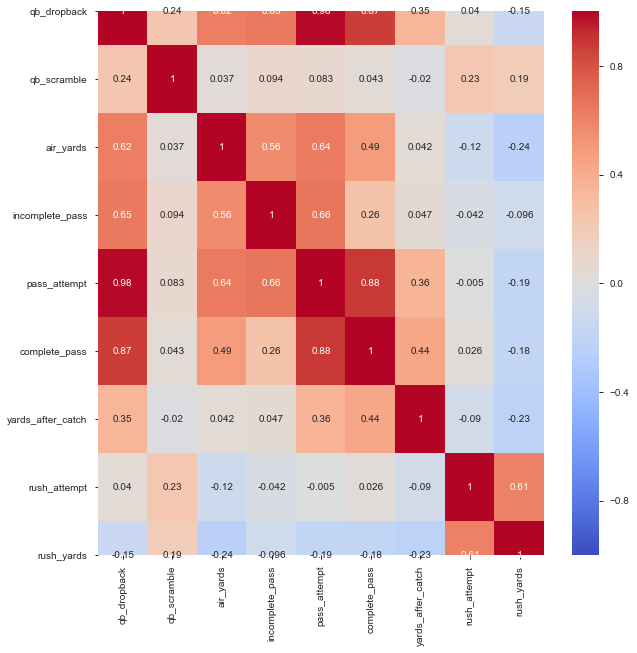

In [224]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

In [7]:
pandas_profiling.ProfileReport(X)

In [8]:
# Transforming data into normal distribution
X_transformed = np.cbrt(X)
X_transformed.head()

qb_dropback  qb_kneel  qb_spike  qb_scramble  air_yards  first_down_pass  \
0     1.259921       0.0       0.0          0.0   3.141381              0.0   
1     1.000000       0.0       0.0          0.0   1.442250              0.0   
2     1.587401       0.0       0.0          0.0  -1.709976              1.0   
3     1.442250       0.0       0.0          0.0   2.714418              1.0   
4     1.000000       0.0       0.0          0.0   0.000000              0.0   

   incomplete_pass  interception  pass_attempt  complete_pass  sack  \
0         1.000000           0.0      1.259921        1.00000   0.0   
1         0.000000           0.0      1.000000        1.00000   0.0   
2         0.000000           0.0      1.587401        1.44225   1.0   
3         1.259921           0.0      1.442250        1.00000   0.0   
4         0.000000           0.0      1.000000        0.00000   1.0   

   pass_touchdown  yards_after_catch  receiving_touchdown  rush_attempt  \
0             0.0           2.000000                  0.0      1.000000   
1             0.0           1.000000                  0.0      1.259921   
2             0.0           3.000000                  0.0      1.000000   
3             0.0           1.587401                  0.0      1.259921   
4             0.0           0.000000                  0.0      1.259921   

   rush_yards  first_down_rush  rush_touchdown  fumble_lost  
0   -1.442250              0.0             0.0          0.0  
1   -1.259921              0.0             0.0          0.0  
2   -1.000000              0.0             0.0          0.0  
3    3.271066              1.0             0.0          0.0  
4    1.442250              0.0             0.0          0.0

In [9]:
pandas_profiling.ProfileReport(X_transformed)

In [10]:
import tensorflow
tensorflow.keras.__version__

'2.2.4-tf'

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [12]:
X_transformed_train, X_transformed_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)

In [13]:
X_scaler = MinMaxScaler().fit(X_transformed_train)
X_train_scaled = X_scaler.transform(X_transformed_train)
X_test_scaled = X_scaler.transform(X_transformed_test)

In [14]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [15]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

## Creating a Deep Learning Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=19))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [18]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 12,403
Trainable params: 12,403
Non-trainable params: 0
_________________________________________________________________


In [20]:
print(X_train_scaled.shape)
(y_train_categorical.shape)

(44385, 19)


(44385, 3)

In [21]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Train on 44385 samples
Epoch 1/60
44385/44385 - 2s - loss: 0.3011 - accuracy: 0.8798
Epoch 2/60
44385/44385 - 1s - loss: 0.2599 - accuracy: 0.8924
Epoch 3/60
44385/44385 - 1s - loss: 0.2543 - accuracy: 0.8920
Epoch 4/60
44385/44385 - 1s - loss: 0.2489 - accuracy: 0.8943
Epoch 5/60
44385/44385 - 2s - loss: 0.2456 - accuracy: 0.8956
Epoch 6/60
44385/44385 - 1s - loss: 0.2447 - accuracy: 0.8961
Epoch 7/60
44385/44385 - 1s - loss: 0.2435 - accuracy: 0.8958
Epoch 8/60
44385/44385 - 1s - loss: 0.2429 - accuracy: 0.8970
Epoch 9/60
44385/44385 - 1s - loss: 0.2423 - accuracy: 0.8970
Epoch 10/60
44385/44385 - 1s - loss: 0.2417 - accuracy: 0.8974
Epoch 11/60
44385/44385 - 1s - loss: 0.2409 - accuracy: 0.8965
Epoch 12/60
44385/44385 - 1s - loss: 0.2409 - accuracy: 0.8974
Epoch 13/60
44385/44385 - 1s - loss: 0.2407 - accuracy: 0.8980
Epoch 14/60
44385/44385 - 1s - loss: 0.2402 - accuracy: 0.8975
Epoch 15/60
44385/44385 - 1s - loss: 0.2398 - accuracy: 0.8981
Epoch 16/60
44385/44385 - 1s - loss: 0.23

## Quantifying model

In [22]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

14795/1 - 0s - loss: 0.2047 - accuracy: 0.8989
Normal Neural Network - Loss: 0.24148510133809195, Accuracy: 0.8988847732543945


## Making Predictions

In [23]:
encoded_predictions = model.predict_classes(X_test_scaled)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [24]:
print(f"Predicted classes: {prediction_labels[:10]}")
print(f"Actual Labels: {list(y_test[:10])}")

Predicted classes: [0 3 0 6 0 6 0 6 3 0]
Actual Labels: [0, 3, 0, 6, 3, 6, 0, 6, 3, 0]


In [25]:
predictions = pd.DataFrame({'predicted': prediction_labels,
                           'Actual': y_test})

In [26]:
predictions.head()

predicted  Actual
15912          0       0
19856          3       3
24164          0       0
15266          6       6
34556          0       3

---

# Logistic Regression Model

In [27]:
from sklearn.model_selection import train_test_split

X_transformed_train, X_transformed_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [28]:
# Creating a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class='multinomial', solver ='newton-cg')
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
classifier.fit(X_transformed_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
print(f"Training Data Score: {classifier.score(X_transformed_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_transformed_test, y_test)}")

Training Data Score: 0.8930043933761406
Testing Data Score: 0.8925312605610003


In [31]:
# Making predictions

In [32]:
predictions = classifier.predict(X_transformed_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

Prediction  Actual
15912           0       0
19856           3       3
24164           0       0
15266           6       6
34556           0       3
...           ...     ...
58159           0       0
19344           0       0
761             3       0
28938           6       6
50373           0       0

[14795 rows x 2 columns]

In [33]:
coefficients = classifier.coef_

In [34]:
coefficients.shape

(3, 19)

# A different Approach

The desired outcome of a drive is to score either a field goal or preferably a touchdown.
One possible thing we might want to know is what provides the best chance of scoring a field goal

To do that, we'll remove the all drives with outcomes of 0 points, which will also remove drives that ended in either an interception or a lost fumble.

In [35]:
scoring_drives = nfl_data.loc[nfl_data.resulting_points != 0]
scoring_drives.head()

game_date     game_id  drive  qb_dropback  qb_kneel  qb_spike  \
10  2009-09-10  2009091000     11          5.0         0         0   
11  2009-09-10  2009091000     12          3.0         0         0   
19  2009-09-10  2009091000     20          4.0         0         0   
20  2009-09-10  2009091000     21          8.0         0         0   
24  2009-09-10  2009091000     25          7.0         0         0   

    qb_scramble  air_yards  first_down_pass  incomplete_pass  ...  \
10            0       90.0              3.0              1.0  ...   
11            0       68.0              2.0              1.0  ...   
19            0       35.0              2.0              0.0  ...   
20            0       20.0              4.0              0.0  ...   
24            0       55.0              3.0              2.0  ...   

    yards_after_catch  receiving_touchdown  rush_attempt  rush_yards  \
10                5.0                  1.0           0.0         0.0   
11               21.0                  1.0           0.0         0.0   
19                0.0                  0.0           2.0         1.0   
20               37.0                  0.0           3.0         5.0   
24               13.0                  0.0           2.0         3.0   

    first_down_rush  rush_touchdown  fumble_lost  yards_gained  \
10              0.0             0.0          0.0          79.0   
11              0.0             0.0          0.0          71.0   
19              0.0             0.0          0.0          36.0   
20              0.0             0.0          0.0          56.0   
24              1.0             0.0          0.0          63.0   

    field_goal_result  resulting_points  
10                  0                 6  
11                  0                 6  
19                  1                 3  
20                  1                 3  
24                  1                 3  

[5 rows x 25 columns]

In [36]:
scoring_drives.shape

(19734, 25)

In [37]:
scoring_drives.columns

Index(['game_date', 'game_id', 'drive', 'qb_dropback', 'qb_kneel', 'qb_spike',
       'qb_scramble', 'air_yards', 'first_down_pass', 'incomplete_pass',
       'interception', 'pass_attempt', 'complete_pass', 'sack',
       'pass_touchdown', 'yards_after_catch', 'receiving_touchdown',
       'rush_attempt', 'rush_yards', 'first_down_rush', 'rush_touchdown',
       'fumble_lost', 'yards_gained', 'field_goal_result', 'resulting_points'],
      dtype='object')

In [38]:
# Defining features
X = scoring_drives[['qb_dropback', 'qb_scramble', 'air_yards', 'incomplete_pass', 'pass_attempt', 'complete_pass', 'yards_after_catch', 'rush_attempt', 'rush_yards']]
y = scoring_drives.resulting_points

In [39]:
# Transforming data into normal distribution
X_transformed = np.cbrt(X)
X_transformed.head()

qb_dropback  qb_scramble  air_yards  incomplete_pass  pass_attempt  \
10     1.709976          0.0   4.481405         1.000000      1.709976   
11     1.442250          0.0   4.081655         1.000000      1.442250   
19     1.587401          0.0   3.271066         0.000000      1.587401   
20     2.000000          0.0   2.714418         0.000000      2.000000   
24     1.912931          0.0   3.802952         1.259921      1.912931   

    complete_pass  yards_after_catch  rush_attempt  rush_yards  
10       1.587401           1.709976      0.000000    0.000000  
11       1.259921           2.758924      0.000000    0.000000  
19       1.587401           0.000000      1.259921    1.000000  
20       1.912931           3.332222      1.442250    1.709976  
24       1.709976           2.351335      1.259921    1.442250

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [41]:
# Splitting the data into training and testing sets 
X_transformed_train, X_transformed_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)

In [42]:
# Scaling data
X_scaler = MinMaxScaler().fit(X_transformed_train)
X_train_scaled = X_scaler.transform(X_transformed_train)
X_test_scaled = X_scaler.transform(X_transformed_test)

In [73]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [74]:
# Creating a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
# Fitting the data
classifier.fit(X_train_scaled, encoded_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
print(f"Training Data Score: {classifier.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, encoded_y_test)}")

Training Data Score: 0.7307432432432432
Testing Data Score: 0.720308066477503


In [78]:
# Making predictions
predictions = classifier.predict(X_transformed_test)
predicted = pd.DataFrame({"Prediction": predictions, "Actual": encoded_y_test})
predicted.head()

Prediction  Actual
0           1       1
1           1       1
2           1       0
3           1       0
4           1       1

In [88]:
coefficients = classifier.coef_
coefficients_array = coefficients[0]
coefficients_array

array([-2.55105237,  0.85949154,  6.70790547, -5.94940929, -4.84381015,
        8.11819315,  5.41432957, -3.60389204,  5.31114543])

In [89]:
# Calculating odds ratio
odds_ratio = np.exp(coefficients_array)
odds_ratio

array([7.79995382e-02, 2.36195942e+00, 8.18853727e+02, 2.60738027e-03,
       7.87698428e-03, 3.35495336e+03, 2.24601914e+02, 2.72175841e-02,
       2.02582139e+02])

In [87]:
classifier.score

<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>

In [90]:
odds_ratio_df = pd.DataFrame({"qb_dropback": [odds_ratio[0]], 
                           "qb_scramble": [odds_ratio[1]], 
                           "air_yards": [odds_ratio[2]], 
                           "incomplete_pass": [odds_ratio[3]], 
                           "pass_attempt": [odds_ratio[4]], 
                           "complete_pass": [odds_ratio[5]], 
                           "yards_after_catch": [odds_ratio[6]], 
                           "rush_attempt": [odds_ratio[7]], 
                           "rush_yards": [odds_ratio[8]]})
odds_ratio_df.head()

qb_dropback  qb_scramble   air_yards  incomplete_pass  pass_attempt  \
0        0.078     2.361959  818.853727         0.002607      0.007877   

   complete_pass  yards_after_catch  rush_attempt  rush_yards  
0    3354.953362         224.601914      0.027218  202.582139

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
x = np.arange(len(odds_ratio_df.columns))
y_pos = odds_ratio_df.values

In [93]:
y = y_pos[0]
#np.exp(y).sort()


Text(0, 0.5, 'Odds Ratio')

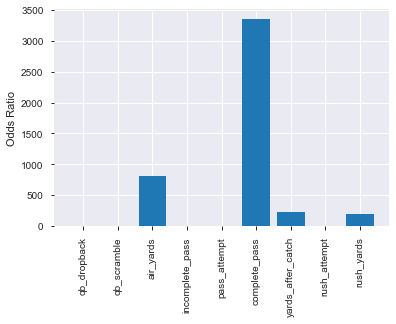

In [96]:
plt.bar(np.arange(len(odds_ratio)), odds_ratio)
plt.xticks(np.arange(9), ('qb_dropback', 'qb_scramble', 'air_yards', 'incomplete_pass', 'pass_attempt', 'complete_pass', 'yards_after_catch', 'rush_attempt', 'rush_yards'), rotation=90)
plt.ylabel('Odds Ratio')

In [172]:
# Let's create an imaginary line
imaginary_drive = [0.0, 0.0, 0, 0.000000 , 0 , 0.57401, 0, 0.000000, 0.0]
imaginary_drive_array = np.asarray(imaginary_drive)
reshaped = imaginary_drive_array.reshape(1, -1)

In [173]:
imaginary_prediction = classifier.predict(reshaped)

In [174]:
imaginary_prediction

array([1])

In [204]:
import matplotlib
matplotlib.__version__

'3.1.1'

In [228]:
# Saving the model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(classifier, 'resources/logistic_regression.pkl') 
  
# Load the model from the file 
#classifier_from_joblib = joblib.load('logistic_regression.pkl')  
  
# Use the loaded model to make predictions 
#classifier_from_joblib.predict(X_test_scaled) 


['resources/logistic_regression.pkl']

In [230]:
# Load the model from the file 
classifier_from_joblib = joblib.load('resources/logistic_regression.pkl')  
  
# Use the loaded model to make predictions 
classifier_from_joblib.predict(X_test_scaled) 


array([1, 1, 0, ..., 1, 0, 0])